In [1]:
import numpy as np
import sys
import os
sys.path.append(os.path.abspath('../'))
from scipy.io import loadmat
import loaders
from preprocessing.vsdi_preprocessing import clean_outliers,pca_ica,glm
from functools import reduce
from pathlib import Path
import matplotlib.pyplot as plt
import time

In [4]:
datapath = Path('/ceph/imaging1/davide/ATC_Data_preprocessed')

output_path = Path('/scratch/dspalla/ATC_analysis')
output_path.mkdir(parents=True,exist_ok=True)

In [5]:
animals = ['A04','A06','A07','A08']
days = ['Day1','Day3','Day5','Day7']

for animal in animals:
    print(f'animal {animal}')
    vsdi_total = []
    masks = [] 
    for day in days:
        print(day)
        vsdi1 = loadmat(datapath.joinpath(f'{animal}/{day}/vsdi_ATC1.mat'))['vsdi_data']
        vsdi2 = loadmat(datapath.joinpath(f'{animal}/{day}/vsdi_ATC2.mat'))['vsdi_data']
        mask = loadmat(datapath.joinpath(f'{animal}/{day}/vsdi_mask.mat'))['mask']

        vsd1 = clean_outliers(vsdi1,nsigma=5)
        vsdi2 = clean_outliers(vsdi2,nsigma=5)

        vsdi = np.dstack([vsdi1,vsdi2])
        
        vsdi_total.append(vsdi1)
        masks.append(mask)

    vsdi_total = np.dstack(vsdi_total)
    np.save(output_path.joinpath(f'vsdi_total_{animal}'),vsdi_total)
    
    total_mask = reduce(lambda x, y: np.logical_and(x, y), masks)
    np.save(output_path.joinpath(f'mask_total_{animal}'),vsdi_total)
    
    print('Data concatenated')
    
    # fit pca-ica
    start_time = time.time()
    print('fitting PCA-ICA')
    footprints, timecourses = pca_ica(vsdi_total,total_mask)
    end_time = time.time()
    np.save(output_path.joinpath(f'footprints_{animal}'),footprints)
    np.save(output_path.joinpath(f'timecourses_{animal}'),timecourses)
    print(f'Done in {end_time-start_time}')



animal A04
Day1
Day3
Day5
Day7
Data concatenated
fitting PCA-ICA
Done in 9.82858657836914
animal A06
Day1
Day3
Day5
Day7
Data concatenated
fitting PCA-ICA
Done in 10.563143730163574
animal A07
Day1
Day3
Day5
Day7
Data concatenated
fitting PCA-ICA
Done in 10.94427227973938
animal A08
Day1
Day3
Day5
Day7
Data concatenated
fitting PCA-ICA
Done in 10.822699785232544


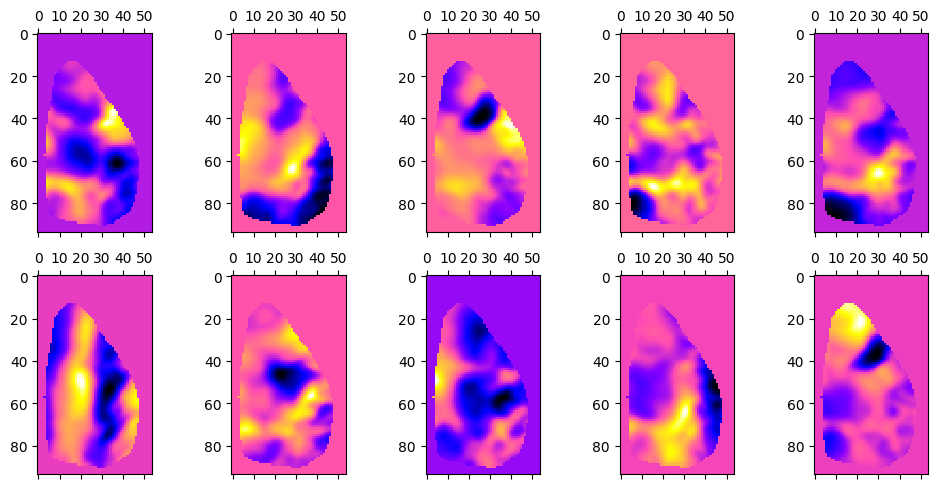

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
for i,f in enumerate(footprints):
    ax = plt.subplot(2,5,i+1)
    ax.matshow(f,cmap=plt.cm.gnuplot2)
plt.tight_layout()
